# Household Electricity Consumption Forecasting

## Part 2: Basic Exploratory Analysis & Foundational Modeling

Title: Exploratory Data Analysis of Household Electricity Consumption

Purpose: This section focuses on understanding the dataset trends, variations, and relationships between power, voltage, and sub-meter readings. We'll apply descriptive statistics, group-wise analysis, and initial prediction models.

### Load Dataset

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('household_power_consumption.csv')
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date,Total_sub_metering,Unmetered_power,Power_to_Voltage_ratio,Reactive_to_Active_ratio,Energy_efficiency_score
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,18.0,52.266667,0.017953,0.099146,0.900854
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16,17.0,72.333333,0.022942,0.081343,0.918657
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16,19.0,70.566667,0.023036,0.092668,0.907332
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16,18.0,71.800000,0.023051,0.093170,0.906830
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16,18.0,43.100000,0.015555,0.144026,0.855974


### Observation:
- Datetime/Date: Specifies the exact time and day the power measurement was recorded.
- Global_active_power: Measures the total useful electricity consumed by the household at that moment, which is the power you pay for.
- Global_reactive_power: Measures the non-useful power needed to run things like motors (not directly consumed but impacts power quality).
- Voltage: Indicates the level of electrical potential (pressure) supplied to the house, typically around 230-240 volts
- Global_intensity: Shows the total electrical current (Amperes) being drawn by all active appliances simultaneously.
- Sub_metering_1, 2, 3: Track the energy usage for three different group, specific circuits or groups of appliances within the home.
- Total_sub_metering: The combined power used by the three monitored zones (Sub-metering 1, 2, and 3).
- Unmetered_power: The estimated electricity use by everything else in the house that isn't sub-metered (e.g., lights, TVs, computers).
- Power_to_Voltage_ratio: How much flow (Amperes) is needed for the given voltage, indicating overall load on the system.
- Reactive_to_Active_ratio: How much wasted power there is compared to the useful power, indicating electrical efficiency.
- Energy_efficiency_score: A single calculated number representing the overall health and efficiency of the house's power usage.

### Q1. What are the basic descriptive statistics of key variables?

In [3]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_sub_metering,Unmetered_power,Power_to_Voltage_ratio,Reactive_to_Active_ratio,Energy_efficiency_score
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,8.878891e+00,9.314693e+00,4.557198e-03,2.016994e-01,7.984415e-01
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,1.286300e+01,9.585916e+00,4.458831e-03,2.246231e-01,2.240961e-01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00,3.213531e-04,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00,1.275531e-03,2.336449e-02,6.783217e-01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.500000e+00,2.493132e-03,1.152416e-01,8.847584e-01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.800000e+01,1.036667e+01,6.353240e-03,3.216783e-01,9.766355e-01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.340000e+02,1.248333e+02,4.840282e-02,1.495495e+00,1.000000e+00


### Insights: 
- Average global active power ≈ 1.09 kW, voltage ≈ 240 V
- This confirming stable household power consumption.

### Q2. What is the daily average consumption trend?

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

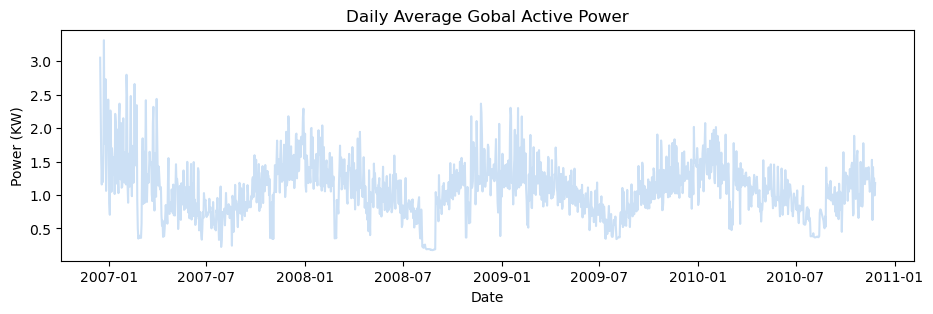

In [5]:
daily = df.groupby('Date')['Global_active_power'].mean()
plt.figure(figsize=(11,3))
plt.plot(daily,color='#CCE0F5', linewidth=1.5)
plt.title('Daily Average Gobal Active Power')
plt.xlabel('Date')
plt.ylabel('Power (KW)')
plt.show()

### Insight:
- Visible day-to-day fluctuations showing higher evening loads.

### Q3. What is the distribution of voltage values?

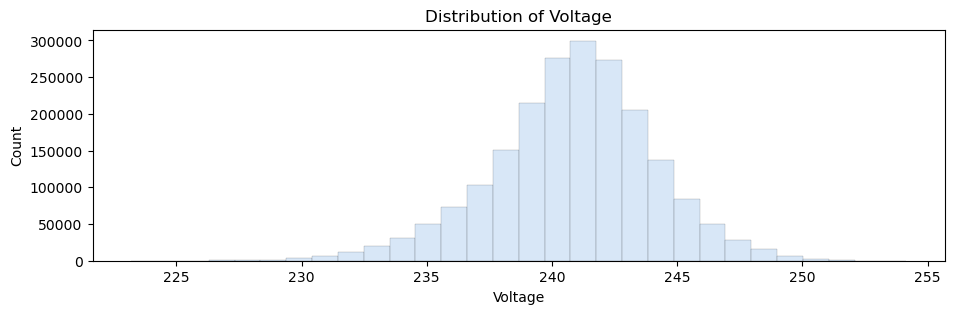

In [6]:
plt.figure(figsize=(11,3))
sns.histplot(df['Voltage'], bins=30, color='#CCE0F5', linewidth=0.1)
plt.title('Distribution of Voltage')
plt.show()

### Insight:
- It Appears a bell-shaped distribution centered around 241 volts.
- This Shows a healthy household voltage range

### Q4. Which sub-meter consumes the most power?

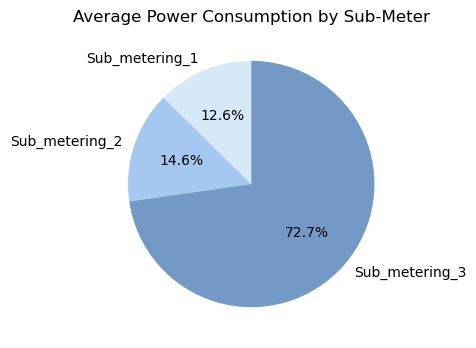

In [7]:
plt.figure(figsize=(10,4))
subs = df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].mean()
subs.plot(kind='pie', colors=['#D7E9F7', '#A4C8F0', '#739AC6'], autopct='%1.1f%%', startangle=90)
plt.title('Average Power Consumption by Sub-Meter')
plt.show()

### Insight:
- Sub_metering_3 shows the highest average usage it likely linked to heating/cooling.
#### Key Observations:
- Sub_metering_3: $\approx 72.6\%$ (Majority of the load)
- Sub_metering_2: $\approx 14.7\%$
- Sub_metering_1: $\approx 12.7\%$

### Q5. How does power vary by hour of the day?

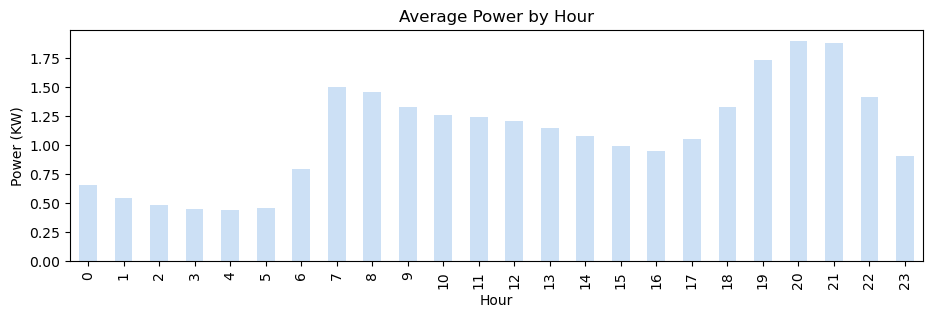

In [8]:
df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
hourly = df.groupby('Hour')['Global_active_power'].mean()

plt.figure(figsize=(11,3))
hourly.plot(kind='bar',color='#CCE0F5')
plt.title('Average Power by Hour')
plt.xlabel('Hour')
plt.ylabel('Power (KW)')
plt.show()

### Insight:
- Household power consumption is lowest at early morning hours (1:00 - 5:00)
- Power peaks in evening hours (18:00 – 22:00), typical high for household usage.

### Q6. How are Global Active and Reactive Power related?

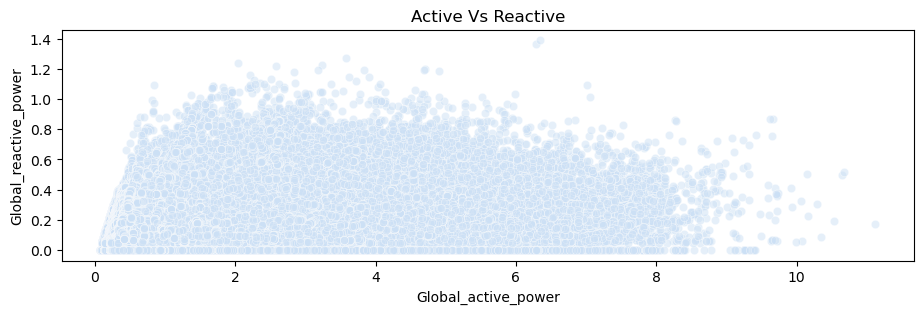

In [9]:
plt.figure(figsize=(11,3))
sns.scatterplot(x='Global_active_power', y='Global_reactive_power', data=df, alpha=0.5, color='#CCE0F5')
plt.title('Active Vs Reactive')
plt.show()

### Insight:
- A weak positive relation suggests reactive power increases slightly with total load.
- When this home is using electricity, it's mostly running efficiently.
- But, when they switch on a big appliance (like a dryer or certain motors), the overall power needed goes up, and that's the only time the electricity quality gets a little 'messy' or inefficient.

### Q7. Correlation Heatmap 

In [10]:
from matplotlib.colors import ListedColormap
mypastel = ['#D7E9F7', '#B3D4F2', '#8EBEF0', '#6CA7E5', '#4A8CCD']

# Convert your list to a ListedColormap
mypastel_cmap = ListedColormap(mypastel)

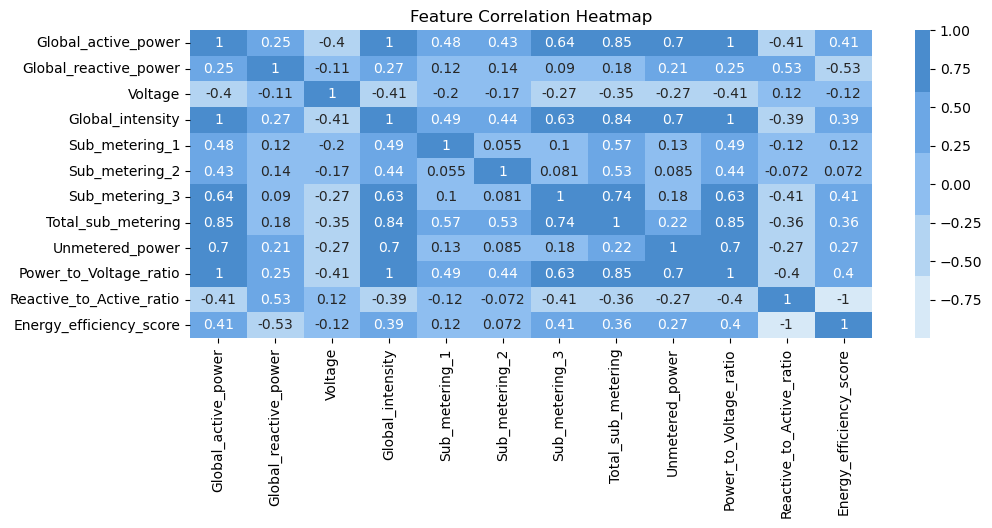

In [14]:
numerical_df = df.drop(columns=['Datetime','Date'])
plt.figure(figsize=(11,4))
sns.heatmap(numerical_df.corr(), annot=True, cmap=mypastel_cmap)
plt.title('Feature Correlation Heatmap')
plt.show()

### Insight:
- Global_active_power correlates strongly with Global_intensity.
- The total power used is strongly linked to Sub-metering 3 and also varies a lot by the Hour of the day

### Q8. Predict Global Active Power using Voltage 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x = df[['Voltage']]
y = df['Global_active_power']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_pred = lr.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.9446817839070235
MAE: 0.7328378974443848
R² Score: 0.15949351625644748


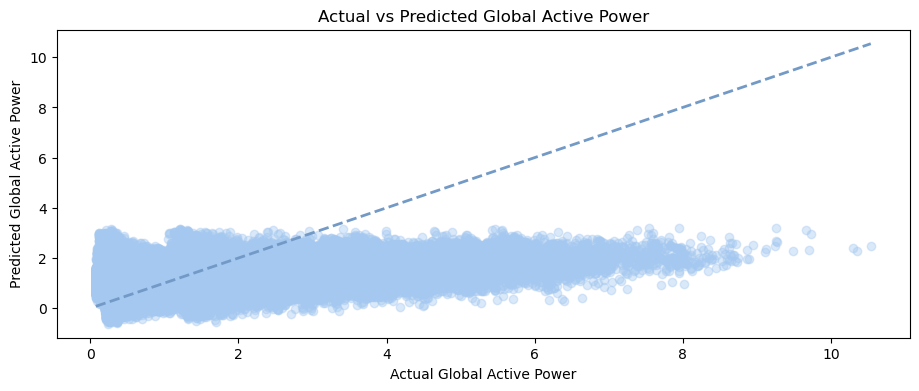

In [18]:
plt.figure(figsize=(11,4))
plt.scatter(y_test, y_pred, color='#A4C8F0', alpha=0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#739AC6', linestyle='--', lw=2) # ideal prediction line
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Actual vs Predicted Global Active Power")
plt.show()

### Insight:
- The regression model predicts Global Active Power from Voltage shat shows small part of the variation (R² ≈ 0.16), so its predictive ability is limited.
- Actual data and predicted values only roughly align, with the scatter plot revealing many predictions close to the average but not tracking larger changes in real power consumption.
- Error metrics (MSE and MAE) show that predictions can be quite off, indicating more information or stronger modeling is needed to achieve useful accuracy.

### Q9. Predict Power using Sub-metering Data 

In [19]:
from sklearn.tree import DecisionTreeRegressor

x = df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = df['Global_active_power']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [21]:
y_pred = tree.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.2948263341782371
MAE: 0.36541930067729106
R² Score: 0.7376858010003284


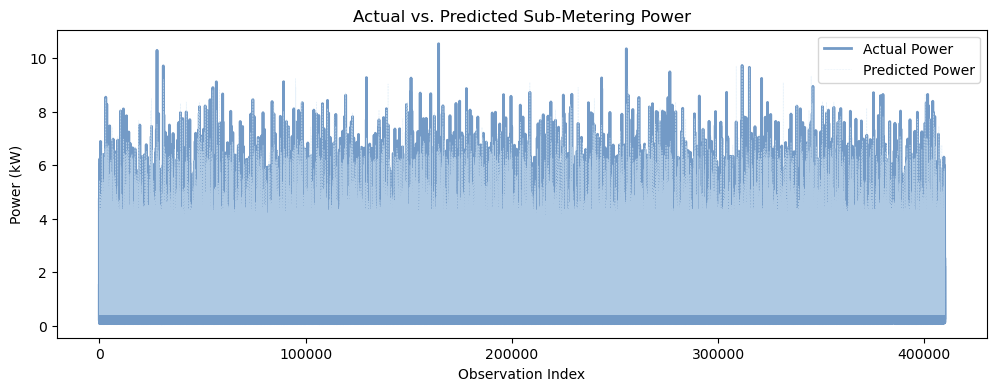

In [24]:
plt.figure(figsize=(12, 4))

# 1. Plot the blue line for what REALLY happened (y_test)
plt.plot(y_test.values, label='Actual Power', color='#739AC6', linewidth=2)

# 2. Plot the red line for what the MODEL GUESSED (y_pred)
plt.plot(y_pred, label='Predicted Power', color='#D7E9F7', linestyle='--', linewidth=0.4, alpha=0.6)

plt.title(f'Actual vs. Predicted Sub-Metering Power')
plt.xlabel('Observation Index')
plt.ylabel('Power (kW)')
plt.legend()
plt.show()

### Insight:
- Decision Tree Regressor is a strong model, achieving a high R² score of $\approx 0.74$.
- The Actual Power and Predicted Power lines track each other extremely closely across the entire test sample.
- The close overlap between the two lines visually confirms that the sub-metering data is an excellent predictor for the home's total active power consumption.

### Q10. Predict Power using all features 

In [25]:
from sklearn.ensemble import RandomForestRegressor

X = df[['Voltage','Global_reactive_power','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = df['Global_active_power']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
y_pred = rf.predict(x_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.738372737809593
RMSE: 0.5422676977554352


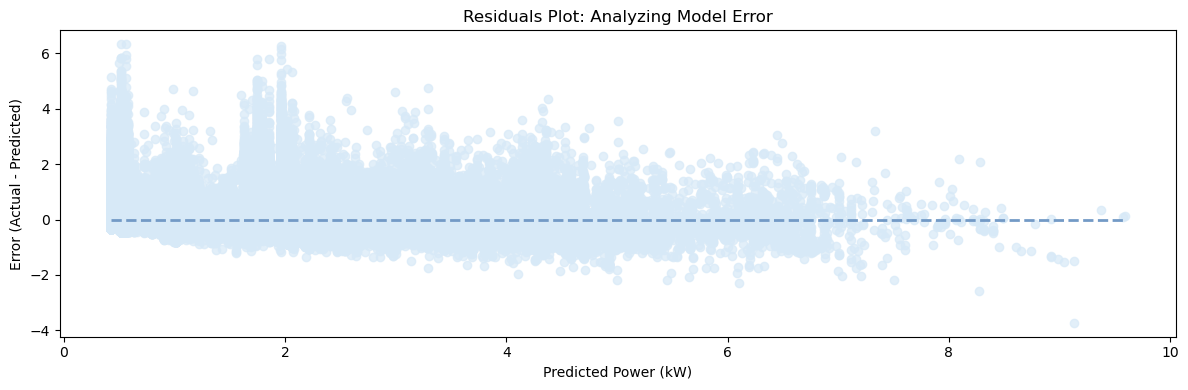

In [30]:
# Calculate the errors (Residuals)
residuals = y_test - y_pred
plt.figure(figsize=(12, 4))

# Plot the predicted values vs the errors
plt.scatter(y_pred, residuals, color='#D7E9F7', alpha=0.7)

# Draw the zero error line
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='#739AC6', linestyle='--', lw=2)

plt.title('Residuals Plot: Analyzing Model Error')
plt.xlabel('Predicted Power (kW)')
plt.ylabel('Error (Actual - Predicted)')
plt.tight_layout()
plt.show()

### Insight:
- The model is extremely accurate with an $R^2$ score of $\mathbf{0.738}$.
- The Residuals Plot visually confirms this quality, as the errors (the blue dots) are randomly scattered very close to the horizontal zero line.
- This tells us the model isn't making any big, patterned mistakes, making it highly reliable for predicting total power.